One question that comes to mind is: "how often do crashes in
the data set involve fatalities, and if so, how many
fatalities?" We start by creating some simple bar charts
to get an idea about this.

<AxesSubplot:xlabel='NUMBER OF PERSONS KILLED', ylabel='count'>

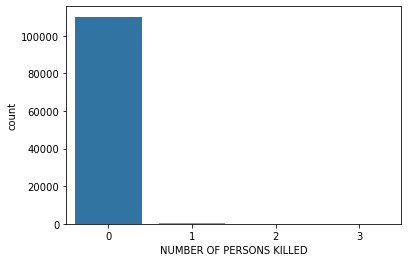

In [3]:
import pandas as pd
import seaborn as sns

nyc_crash = pd.read_csv("nyc_mv_crash_2021.csv")
sns.countplot(x ='NUMBER OF PERSONS KILLED', data = nyc_crash)

We see that the vast majority of collisions in the data set didn't
involve any fatalities, and almost no collusions involved more than one.

Next, let's make similar plots showing the distribution of 
injuries:

<AxesSubplot:xlabel='NUMBER OF PERSONS INJURED', ylabel='count'>

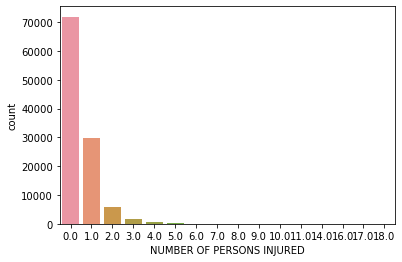

In [5]:
sns.countplot(x ='NUMBER OF PERSONS INJURED', data = nyc_crash)

We observe that majority of crashes involved know injuries, and the number of injuries drops off pretty steeply.

Another plausible question is: do some buroughs have more crashes than others?

<AxesSubplot:xlabel='BOROUGH', ylabel='count'>

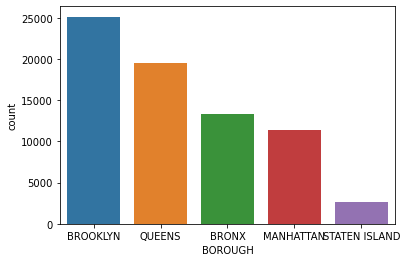

In [6]:
sns.countplot(x ='BOROUGH', data = nyc_crash)

Here, we create a map showing the locations of all crashes in the dataset.

<GeoAxesSubplot:title={'center':'Crashes in New York City'}, xlabel='LONGITUDE', ylabel='LATITUDE'>

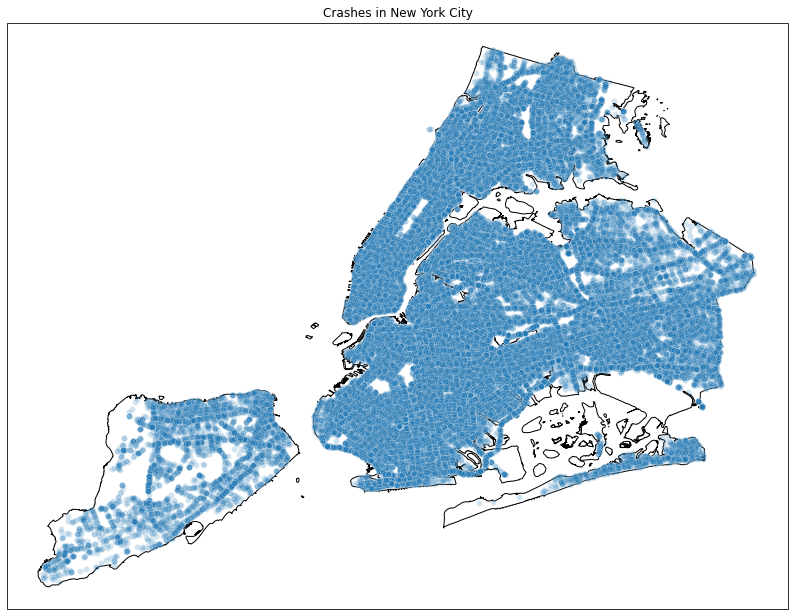

In [13]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
import matplotlib.pyplot as plt
import numpy as np

nyc_crash[nyc_crash.LONGITUDE == 0] = np.nan

reader = shpreader.Reader('nyc_shape/geo_export_a1f96cd2-7ce6-44bb-9568-f3ee8bcba44a.dbf')
geom = list(reader.geometries())
GEOM = cfeature.ShapelyFeature(geom, ccrs.PlateCarree())
plt.figure(figsize=(14, 14))
m = plt.axes(projection=ccrs.PlateCarree())
plt.title("Crashes in New York City")
m.add_feature(GEOM, facecolor='none', edgecolor='black')
sns.scatterplot(x="LONGITUDE", y="LATITUDE", data=nyc_crash,
               alpha=.2)